# **📱 Google Play Store Apps Analysis 📊**

Welcome to the **Google Play Store Apps Analysis** notebook! 🌟  
In this project, we dive deep into a rich dataset of Android apps from the Google Play Store to uncover **trends, insights, and patterns** that define the app ecosystem. 🚀

---

## **🧠 Objectives**

🔍 **Explore** various app characteristics such as category, rating, installs, price, and size.  
📈 **Visualize** key trends using interactive and aesthetic plots.  
💡 **Discover** hidden gems and unusual behaviors like:
- High-rated apps with low installs ⭐📉
- Most expensive apps vs. their ratings 💰🎯
- Extremely large apps or unexpected outliers 🔎

---

## **🛠️ Techniques & Tools Used**

- 🐍 **Python 3**
- 📦 **Pandas** for data wrangling
- 🎨 **Matplotlib & Seaborn** for visualization

---

## **🌟 Let's Uncover the Secrets of the Play Store!**

Get ready to discover exciting patterns and insights that can help developers, marketers, and users better understand the mobile app marketplace. 📊📲

---


# **📚 Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# **⚙️ Basic Important Settings**

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

# **📥 Loading Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

# **🔍 Data Exploration**

In [4]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7791,JavaScript Editor CR,TOOLS,3.9,114,18M,"5,000+",Free,0,Everyone,Tools,"March 16, 2018",1.0.209,4.0 and up
3140,MAIN,TRAVEL_AND_LOCAL,3.6,7081,51M,"1,000,000+",Free,0,Everyone,Travel & Local,"August 6, 2018",4.1.21,4.4 and up
898,"Movies by Flixster, with Rotten Tomatoes",ENTERTAINMENT,4.5,653008,16M,"10,000,000+",Free,0,Everyone,Entertainment,"June 20, 2018",9.1.4,4.4 and up
6302,OkCupid Dating,DATING,4.1,285838,15M,"10,000,000+",Free,0,Mature 17+,Dating,"July 30, 2018",11.10.1,4.1 and up
2819,Huji Cam,PHOTOGRAPHY,4.4,40289,19M,"5,000,000+",Free,0,Everyone,Photography,"July 11, 2018",2.2,5.0 and up
2427,Sway Medical,MEDICAL,5.0,3,22M,100+,Free,0,Everyone,Medical,"July 25, 2018",3.0.0,5.0 and up
607,Live Talk - Free Text and Video Chat,DATING,4.6,185,5.0M,"10,000+",Free,0,Mature 17+,Dating,"July 16, 2018",8.2,4.0.3 and up
7840,Helper for CS:GO,TOOLS,4.4,208,6.0M,"10,000+",Free,0,Everyone,Tools,"June 16, 2016",1.2.1,4.1 and up
6039,Remote for Samsung TV & BluRay Players (Read D...,TOOLS,3.3,1988,7.3M,"500,000+",Free,0,Everyone,Tools,"August 3, 2018",Cow V3.15,4.3 and up
9646,EO Network,BUSINESS,3.5,13,21M,"1,000+",Free,0,Teen,Business,"September 20, 2017",1.0.3,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **🧹 Data Cleaning**

In [7]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

In [8]:
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace(r'\$', '', regex=True).str.strip()

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [9]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Last Updated Day'] = df['Last Updated'].dt.day
df['Last Updated Month'] = df['Last Updated'].dt.month_name()
df['Last Updated Year'] = df['Last Updated'].dt.year

df['Last Updated Day'] = df['Last Updated Day'].astype('Int64')
df['Last Updated Year'] = df['Last Updated Year'].astype('Int64')

In [10]:
median_date = df['Last Updated'].median()

median_day = median_date.day
median_month = median_date.strftime('%B')  
median_year = median_date.year

df['Last Updated Day'] = df['Last Updated Day'].fillna(median_day)
df['Last Updated Month'] = df['Last Updated Month'].fillna(median_month)
df['Last Updated Year'] = df['Last Updated Year'].fillna(median_year)

In [11]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               1
Size                  0
Installs              0
Type                  0
Price                 1
Content Rating        0
Genres                0
Last Updated          1
Current Ver           0
Android Ver           0
Last Updated Day      0
Last Updated Month    0
Last Updated Year     0
dtype: int64

In [13]:
def size_to_mb(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024 
    return np.nan 

df['Size_MB'] = df['Size'].apply(size_to_mb)

median_size = df['Size_MB'].median()
df['Size_MB'] = df['Size_MB'].fillna(median_size)

In [14]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               1
Size                  0
Installs              0
Type                  0
Price                 1
Content Rating        0
Genres                0
Last Updated          1
Current Ver           0
Android Ver           0
Last Updated Day      0
Last Updated Month    0
Last Updated Year     0
Size_MB               0
dtype: int64

In [15]:
df['Reviews'].fillna(0, inplace=True)
df['Price'].fillna(0, inplace=True)

In [16]:
df.drop(['Last Updated', 'Size'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10841 non-null  object 
 1   Category            10841 non-null  object 
 2   Rating              10841 non-null  float64
 3   Reviews             10841 non-null  float64
 4   Installs            10841 non-null  object 
 5   Type                10841 non-null  object 
 6   Price               10841 non-null  float64
 7   Content Rating      10841 non-null  object 
 8   Genres              10841 non-null  object 
 9   Current Ver         10841 non-null  object 
 10  Android Ver         10841 non-null  object 
 11  Last Updated Day    10841 non-null  Int64  
 12  Last Updated Month  10841 non-null  object 
 13  Last Updated Year   10841 non-null  Int64  
 14  Size_MB             10841 non-null  float64
dtypes: Int64(2), float64(4), object(9)
memory usage: 1.3+

In [18]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Current Ver           0
Android Ver           0
Last Updated Day      0
Last Updated Month    0
Last Updated Year     0
Size_MB               0
dtype: int64

# **📊 Exploratory Data Analysis (EDA)**

---

# **🔍 General Overview**

**Summary Statistics**

In [19]:
numeric_cols = ['Rating', 'Reviews', 'Price', 'Size_MB']
summary_stats = df[numeric_cols].describe().loc[['mean', '50%', 'min', 'max']]
summary_stats.rename(index={'50%': 'median'}, inplace=True)
print(summary_stats)

           Rating       Reviews       Price     Size_MB
mean     4.207841  4.441119e+05    1.027273   20.183870
median   4.300000  2.094000e+03    0.000000   13.000000
min      1.000000  0.000000e+00    0.000000    0.008301
max     19.000000  7.815831e+07  400.000000  100.000000


**Distribution of Ratings**

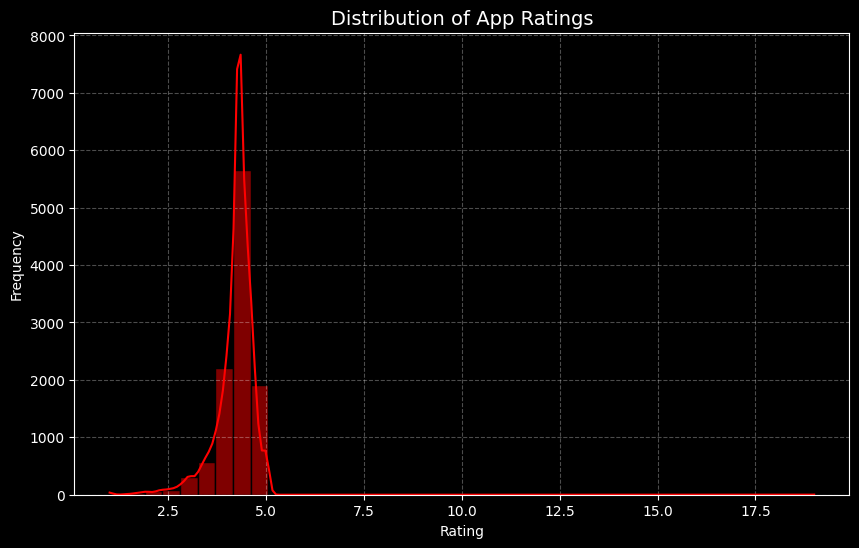

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=40, kde=True, color='red', edgecolor='black')
plt.title('Distribution of App Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Rating Vs Reviews**

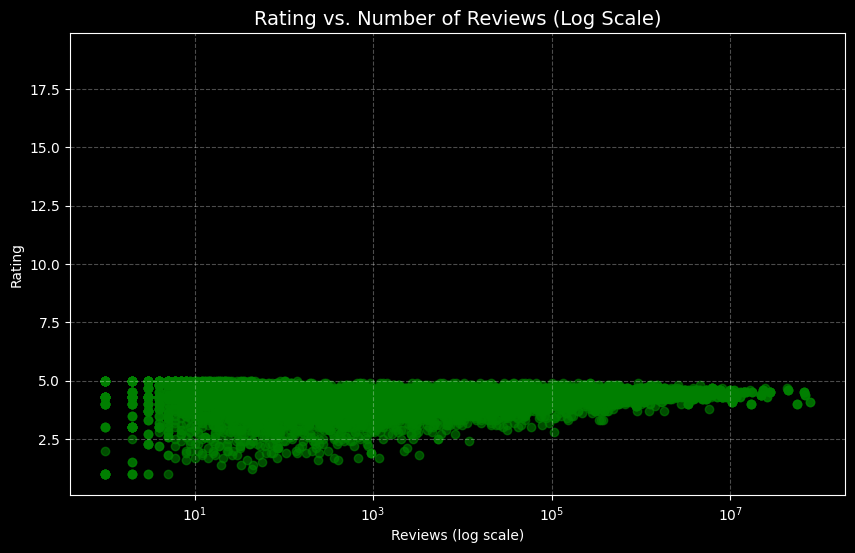

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Rating'], alpha=0.6, color='green')
plt.xscale('log')
plt.title('Rating vs. Number of Reviews (Log Scale)', fontsize=14)
plt.xlabel('Reviews (log scale)')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# **📂 Categorical Analysis**

**Top Categories by Count and Average**

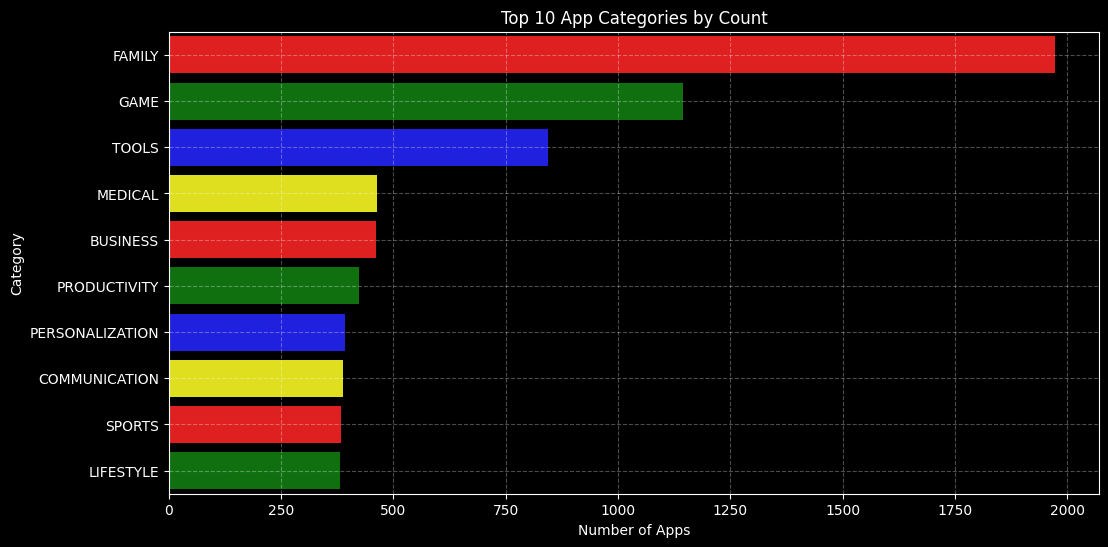

In [22]:
plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette=['red', 'green', 'blue', 'yellow']*3)
plt.title('Top 10 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Best rated Category (Average Rating)**

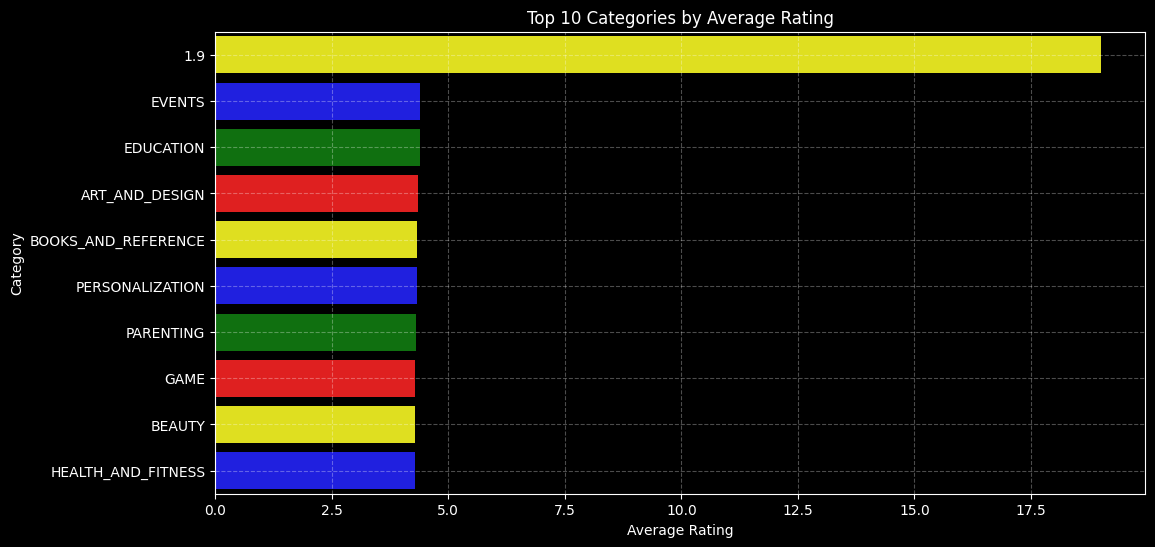

In [23]:
plt.figure(figsize=(12, 6))
top_rated_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_rated_categories.values, y=top_rated_categories.index, palette=['yellow', 'blue', 'green', 'red']*3)
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Paid VS Free App Count**

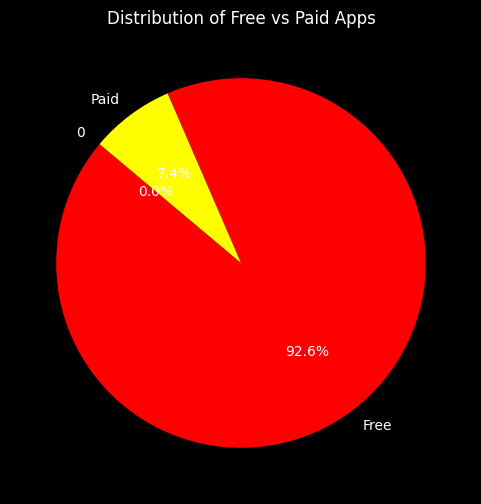

In [24]:
plt.figure(figsize=(6, 6))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'yellow'], startangle=140)
plt.title('Distribution of Free vs Paid Apps')
plt.ylabel('')
plt.show()

**Rating Comparison: Paid VS Free**

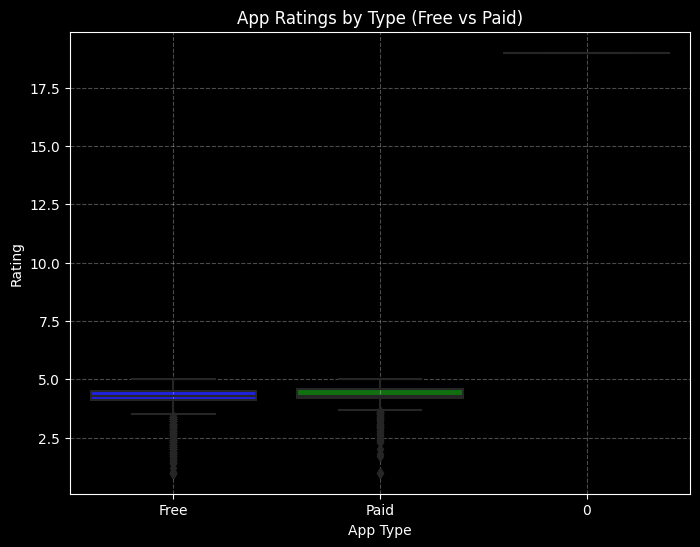

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Rating', data=df, palette=['blue', 'green'])
plt.title('App Ratings by Type (Free vs Paid)')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Size Comparison (Paid VS Free)**

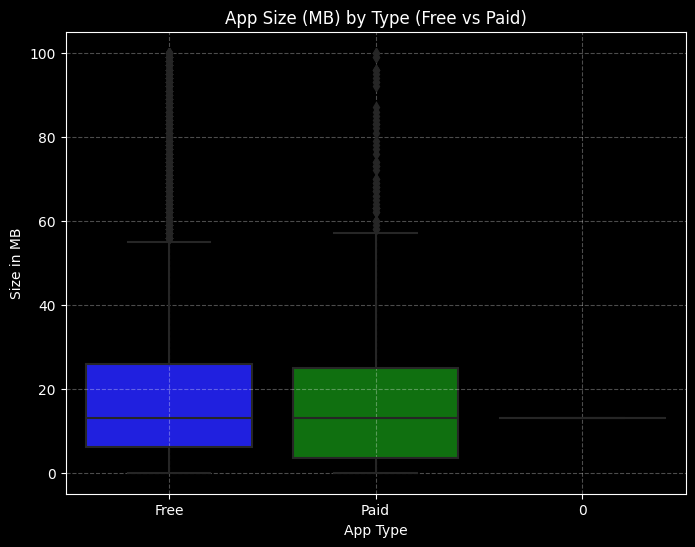

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Size_MB', data=df, palette=['blue', 'green'])
plt.title('App Size (MB) by Type (Free vs Paid)')
plt.xlabel('App Type')
plt.ylabel('Size in MB')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Reviews Comparison (Paid VS Free)**

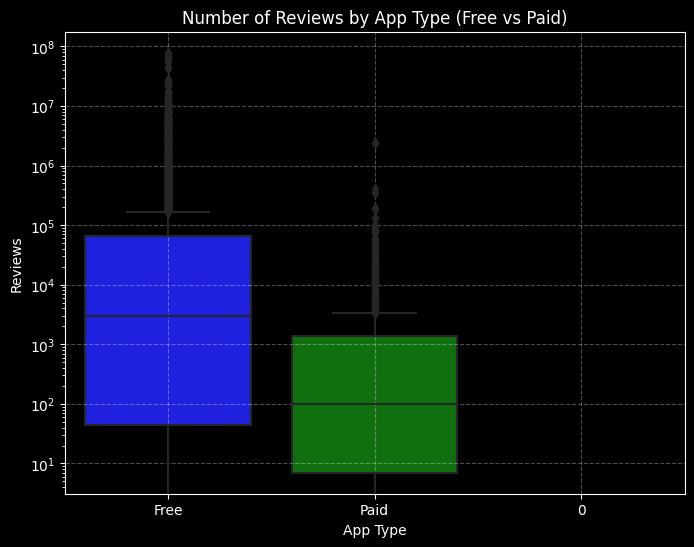

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Reviews', data=df, palette=['blue', 'green'])
plt.title('Number of Reviews by App Type (Free vs Paid)')
plt.xlabel('App Type')
plt.ylabel('Reviews')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Average Price of Paid Apps**

In [28]:
avg_price_paid = df[df['Type'] == 'Paid']['Price'].mean()
print(f'Average Price of Paid Apps: ${avg_price_paid:.2f}')

Average Price of Paid Apps: $13.92


# **🧒 Content Rating Distribution:**

**Distribution of Content Ratings (Count of Apps per Rating)**

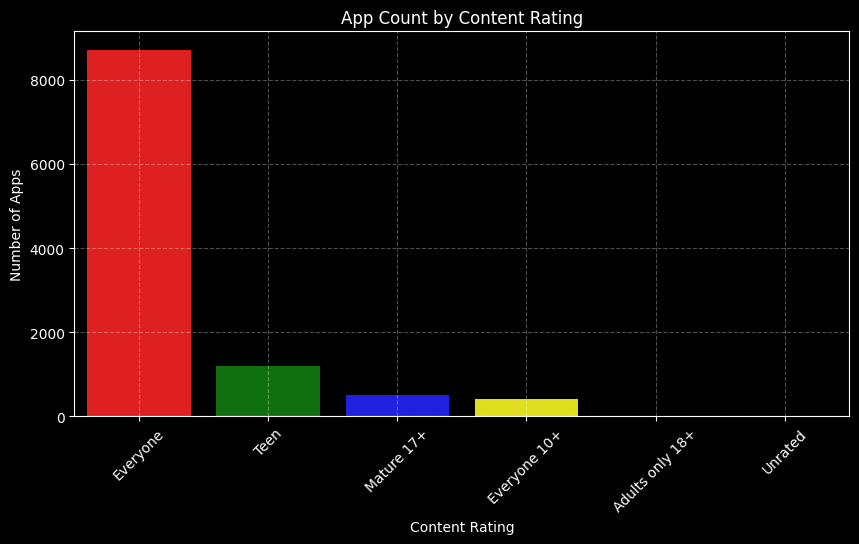

In [29]:
plt.figure(figsize=(10, 5))
content_counts = df['Content Rating'].value_counts()
sns.barplot(x=content_counts.index, y=content_counts.values, palette=['red', 'green', 'blue', 'yellow']*3)
plt.title('App Count by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


**Average Rating per Content Rating**

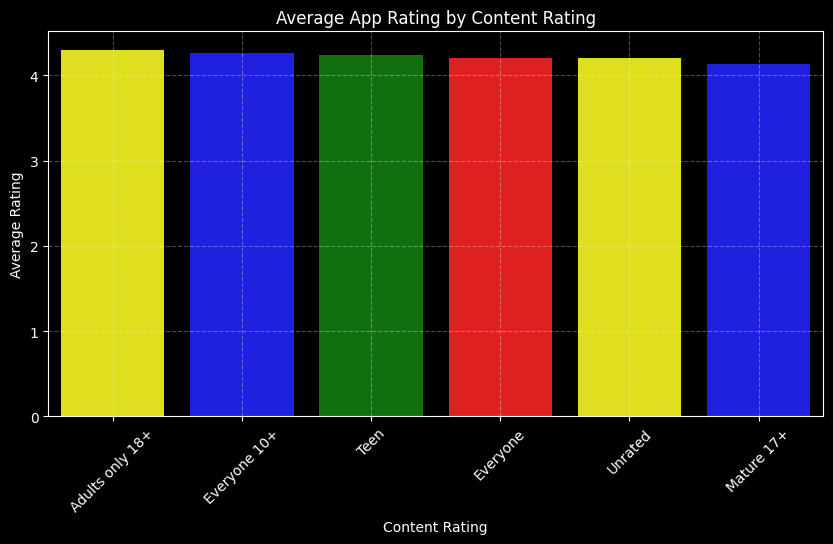

In [30]:
plt.figure(figsize=(10, 5))
avg_content_rating = df.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_content_rating.index, y=avg_content_rating.values, palette=['yellow', 'blue', 'green', 'red']*3)
plt.title('Average App Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# **🧠 Insightful Visualizations**

**Boxplot of Ratings by Category**

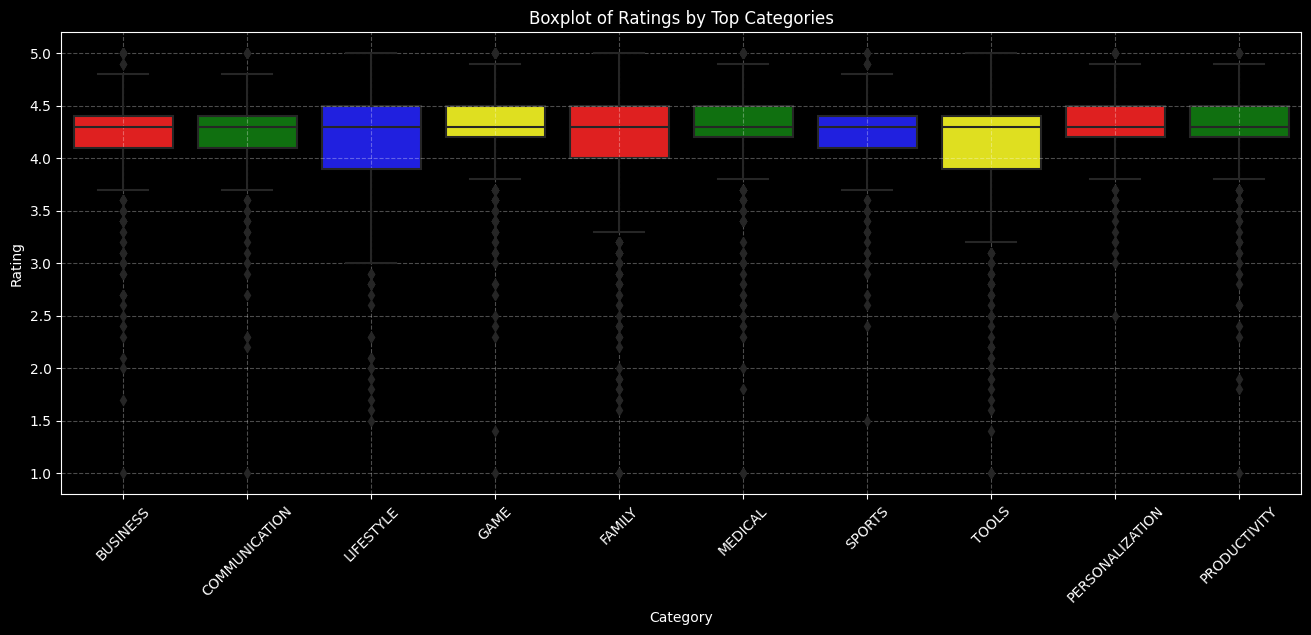

In [31]:
plt.figure(figsize=(16, 6))
top_categories = df['Category'].value_counts().index[:10]  # top 10 only for clarity
sns.boxplot(data=df[df['Category'].isin(top_categories)], x='Category', y='Rating',
            palette=['red', 'green', 'blue', 'yellow']*3)
plt.title('Boxplot of Ratings by Top Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Scatter Plot: Price vs Rating**

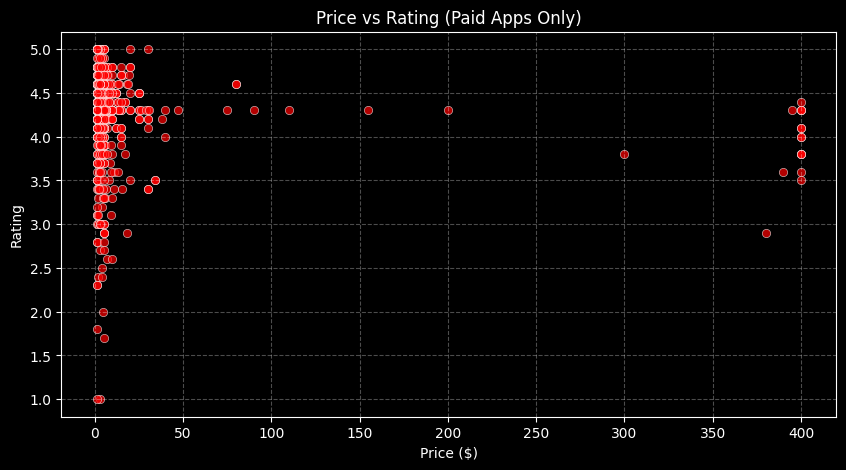

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df['Price'] > 0], x='Price', y='Rating', color='red', alpha=0.7)
plt.title('Price vs Rating (Paid Apps Only)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Reviews vs Installs (Log-Log Plot)**

In [33]:
df_installs = df.copy()

df_installs['Installs_clean'] = df_installs['Installs'].str.replace('[+,]', '', regex=True)

df_installs['Installs_clean'] = pd.to_numeric(df_installs['Installs_clean'], errors='coerce')

df_installs = df_installs.dropna(subset=['Installs_clean'])

df_installs['Installs_clean'] = df_installs['Installs_clean'].astype(int)

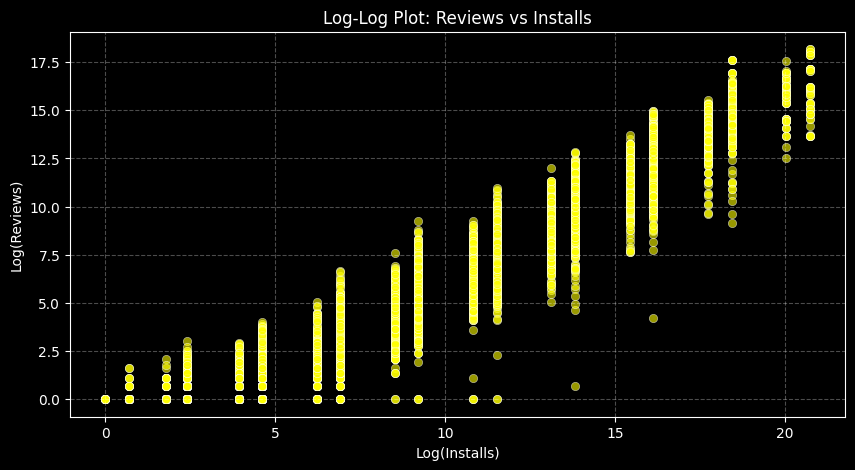

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=np.log1p(df_installs['Installs_clean']),
    y=np.log1p(df_installs['Reviews']),
    color='yellow', alpha=0.6
)
plt.title('Log-Log Plot: Reviews vs Installs')
plt.xlabel('Log(Installs)')
plt.ylabel('Log(Reviews)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Heatmap of Correlation Between Numeric Features**

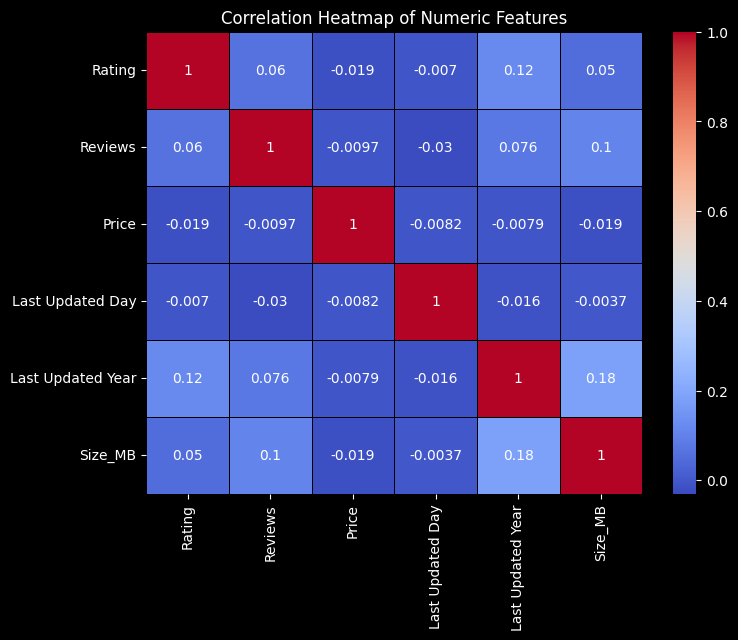

In [35]:
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'Int64']).copy()
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')  
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# **📅 Temporal Insights**

**Year-wise Update Trends**

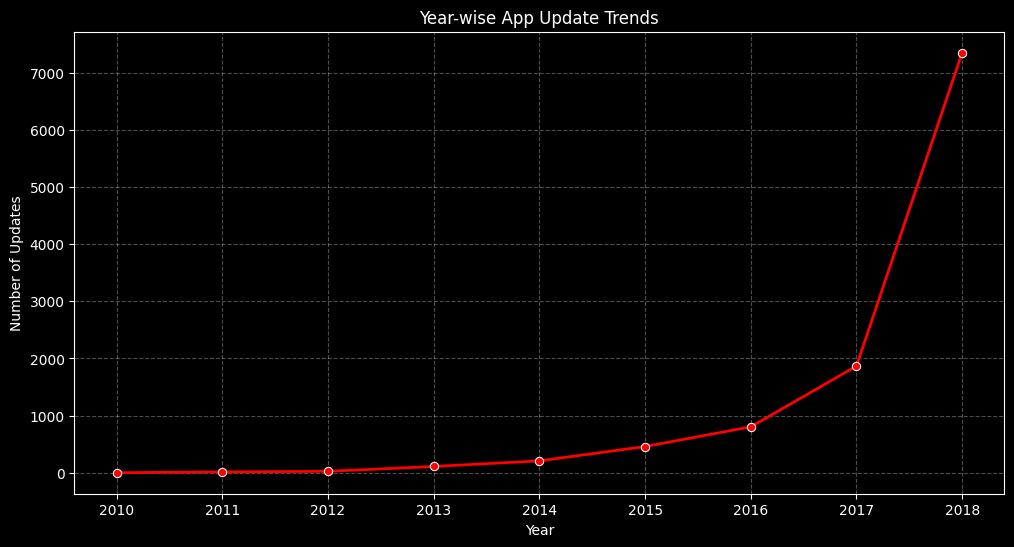

In [36]:
plt.figure(figsize=(12, 6))
df['Last Updated Year'] = df['Last Updated Year'].astype(int)  # Ensure it's an integer type
year_counts = df['Last Updated Year'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, color='red', marker='o', linestyle='-', linewidth=2)
plt.title('Year-wise App Update Trends')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Seasonality (Monthly Update Trends)**

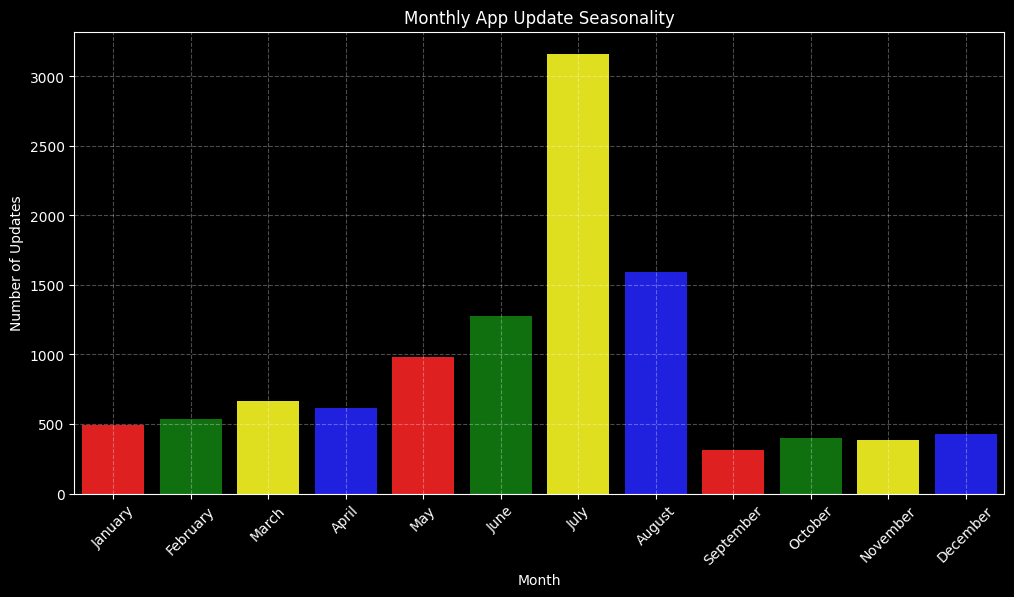

In [37]:
plt.figure(figsize=(12, 6))
month_counts = df['Last Updated Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Custom color palette with Red, Green, Yellow, Blue
custom_palette = ['red', 'green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue']

sns.barplot(x=month_counts.index, y=month_counts.values, palette=custom_palette)
plt.title('Monthly App Update Seasonality')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Age of Apps vs Rating**

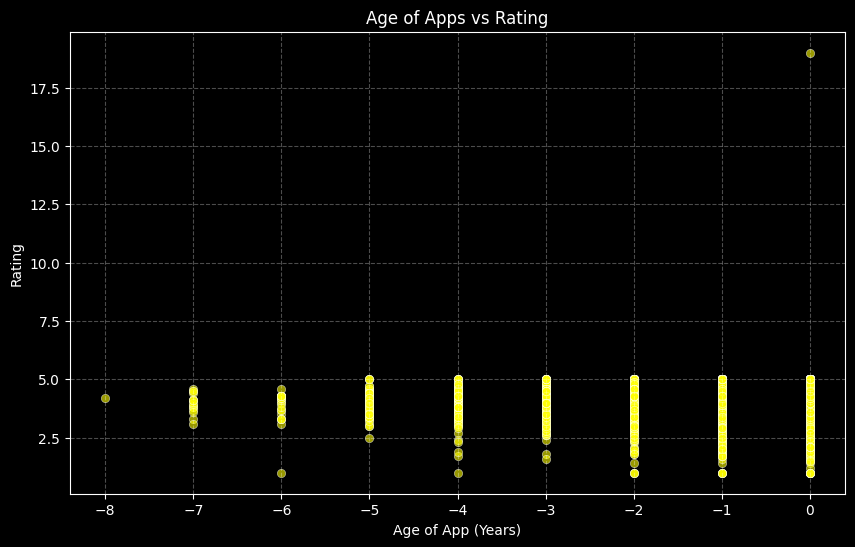

In [38]:
df['Age_of_App'] = df['Last Updated Year'] - df['Last Updated Year'].max()  # Age = max year - update year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_of_App', y='Rating', data=df, color='yellow', alpha=0.6)
plt.title('Age of Apps vs Rating')
plt.xlabel('Age of App (Years)')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# **📦 App Size Analysis**

**Size Distribution**

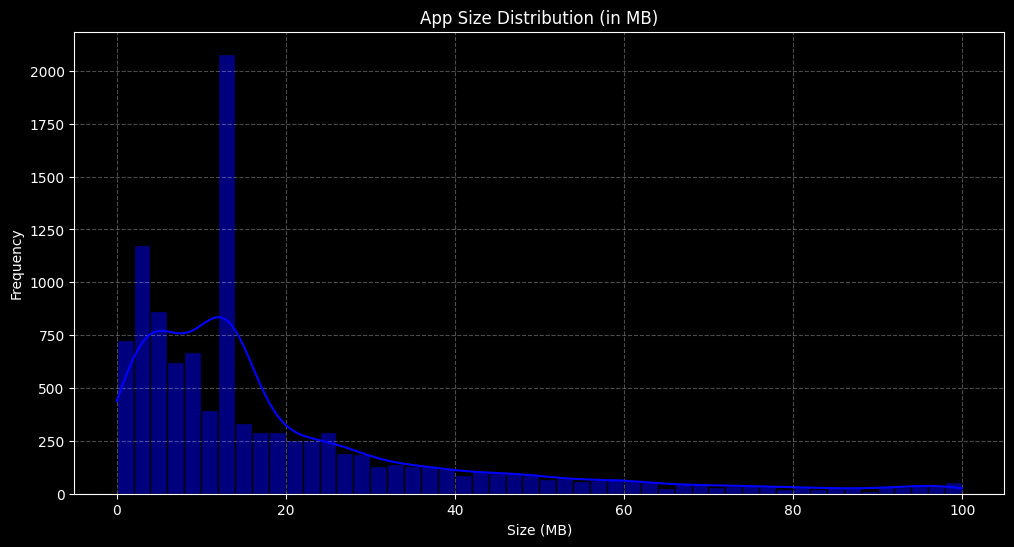

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Size_MB'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('App Size Distribution (in MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Size vs Rating**

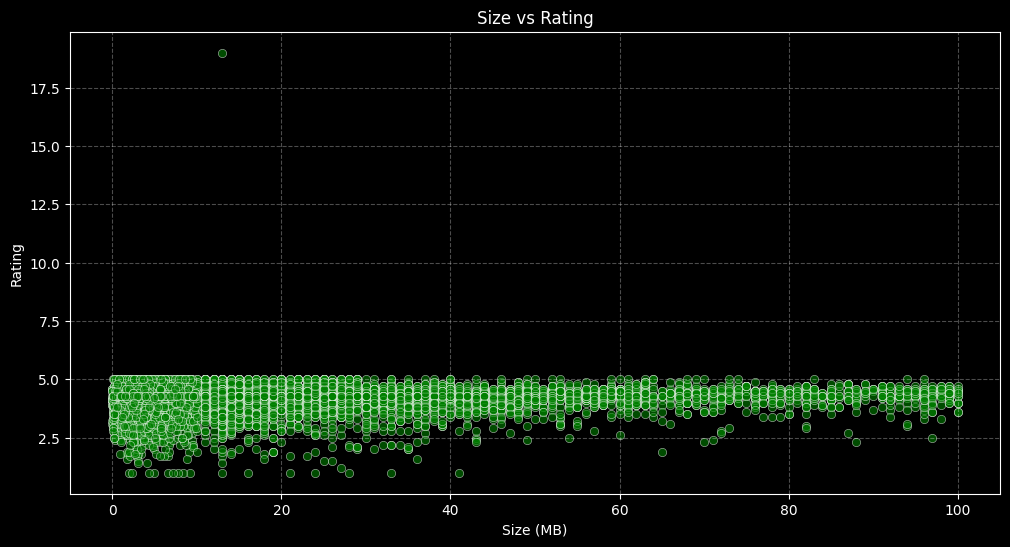

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size_MB', y='Rating', data=df, color='green', alpha=0.6)
plt.title('Size vs Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Size vs Category**

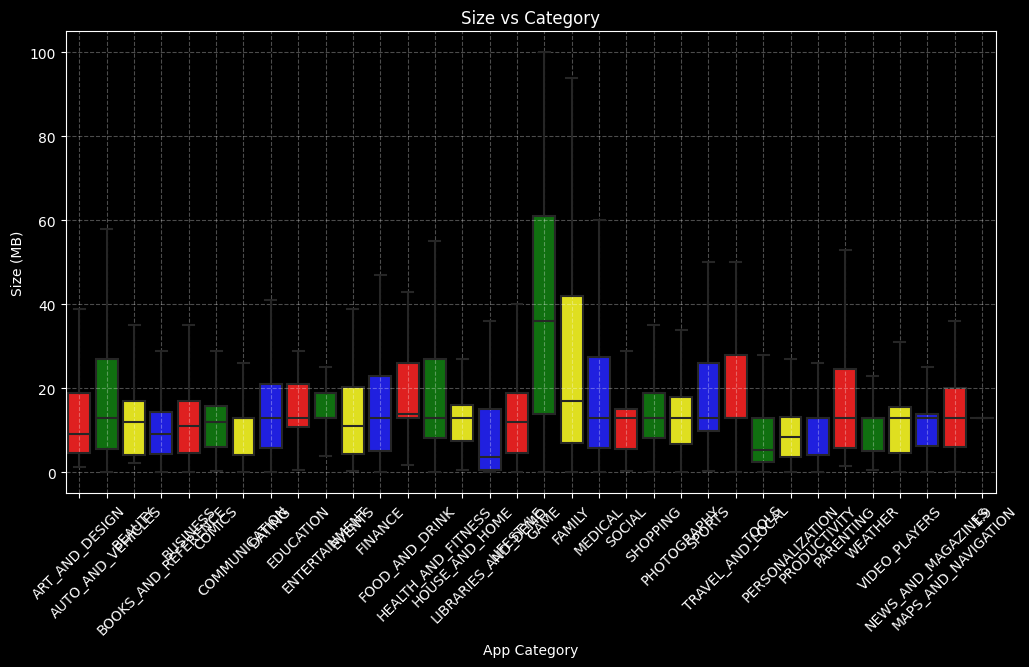

In [41]:
plt.figure(figsize=(12, 6))
custom_palette = ['red', 'green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue']

sns.boxplot(x='Category', y='Size_MB', data=df, palette=custom_palette, showfliers=False)
plt.title('Size vs Category')
plt.xlabel('App Category')
plt.ylabel('Size (MB)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# **🔁 Installs & Popularity**

**Top Installed Apps**

In [42]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

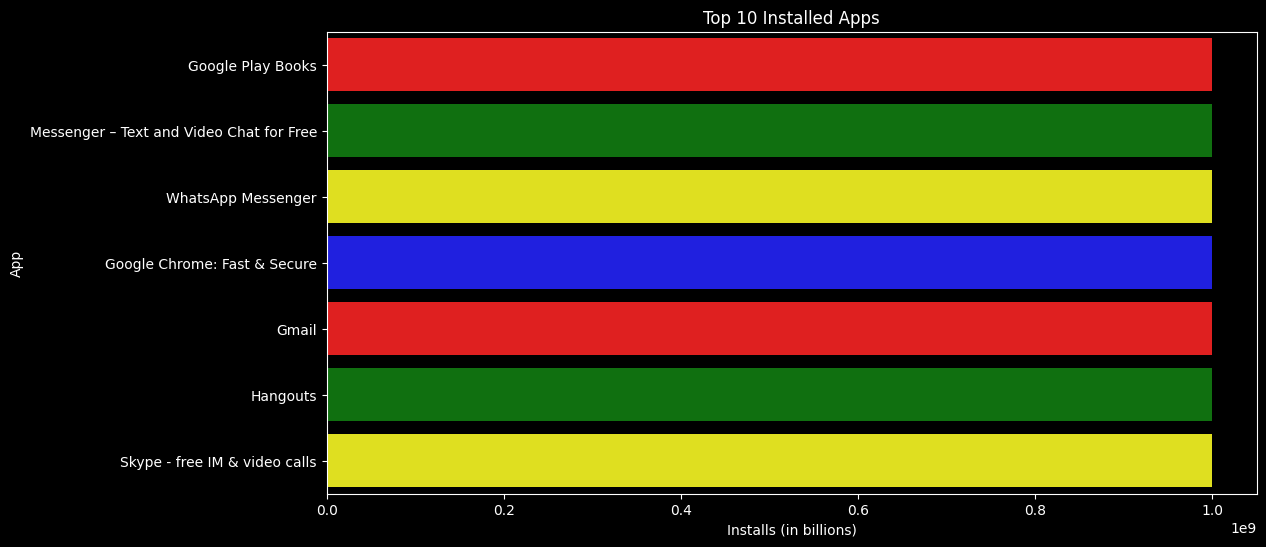

In [43]:
top_installed_apps = df.nlargest(10, 'Installs')[['App', 'Installs']]
custom_palette = ['red', 'green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue', 'red', 'green']

plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='App', data=top_installed_apps, palette=custom_palette)
plt.title('Top 10 Installed Apps')
plt.xlabel('Installs (in billions)')
plt.ylabel('App')
plt.show()

**Most Reviewed vs Most Installed**

In [44]:
most_reviewed_app = df.loc[df['Reviews'].idxmax(), 'App']
most_installed_app = df.loc[df['Installs'].idxmax(), 'App']

print(f'Most Reviewed App: {most_reviewed_app}')
print(f'Most Installed App: {most_installed_app}')

Most Reviewed App: Facebook
Most Installed App: Google Play Books


**Installs Distribution (Tiers)**

In [45]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
labels = ['1K to 10K', '10K to 100K', '100K to 1M', '1M to 10M', '10M to 100M', '100M to 1B', 'more than 1B']
df['Installs Tier'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

In [46]:
df['Installs Tier'] = df['Installs Tier'].fillna(df['Installs Tier'].mode()[0])

In [47]:
df['Installs Tier'].value_counts()

Installs Tier
10M to 100M     2390
1K to 10K       1804
1M to 10M       1708
100M to 1B      1541
100K to 1M      1533
10K to 100K     1384
more than 1B     481
Name: count, dtype: int64

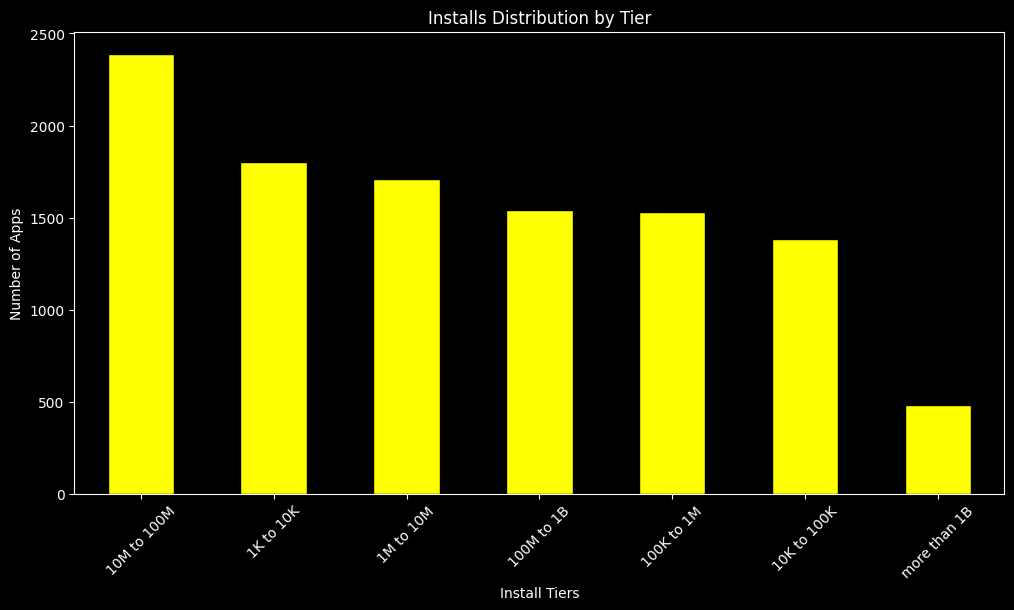

In [48]:
install_distribution = df['Installs Tier'].value_counts()

plt.figure(figsize=(12, 6))
install_distribution.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Installs Distribution by Tier')
plt.xlabel('Install Tiers')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

# **🔎 Deep Dives**

**Top 10 Paid Apps by Rating and by Price:**

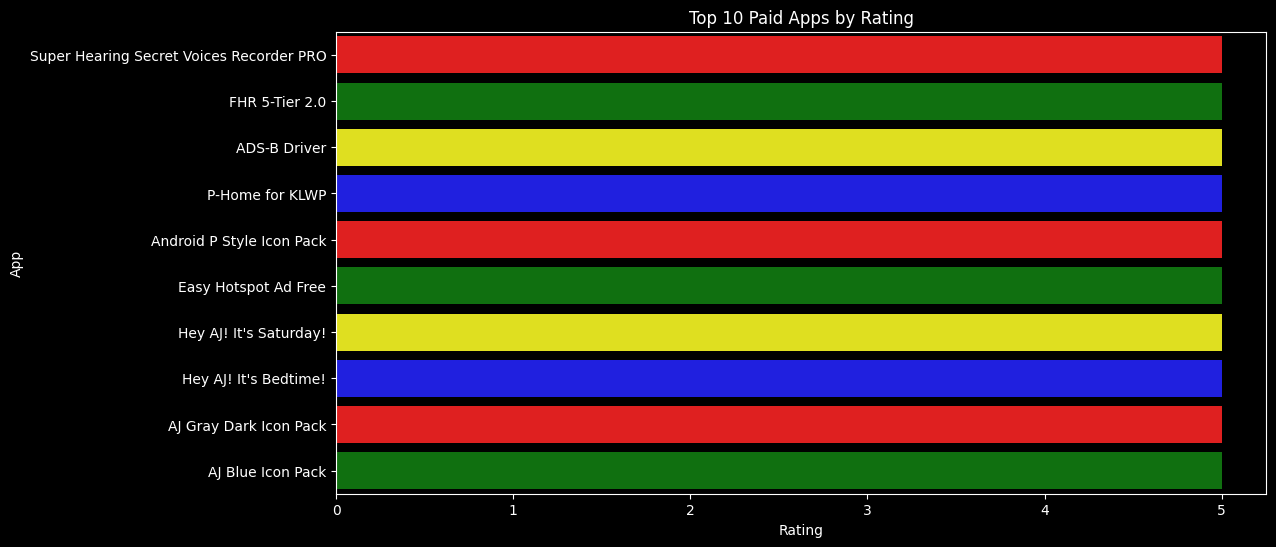

In [49]:
paid_apps = df[df['Type'] == 'Paid']
top_paid_by_rating = paid_apps.nlargest(10, 'Rating')[['App', 'Rating', 'Price']]
custom_palette = ['red', 'green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue', 'red', 'green']

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='App', data=top_paid_by_rating, palette=custom_palette)
plt.title('Top 10 Paid Apps by Rating')
plt.xlabel('Rating')
plt.ylabel('App')
plt.show()


**High Rating but Low Installs (Hidden Gems?):**

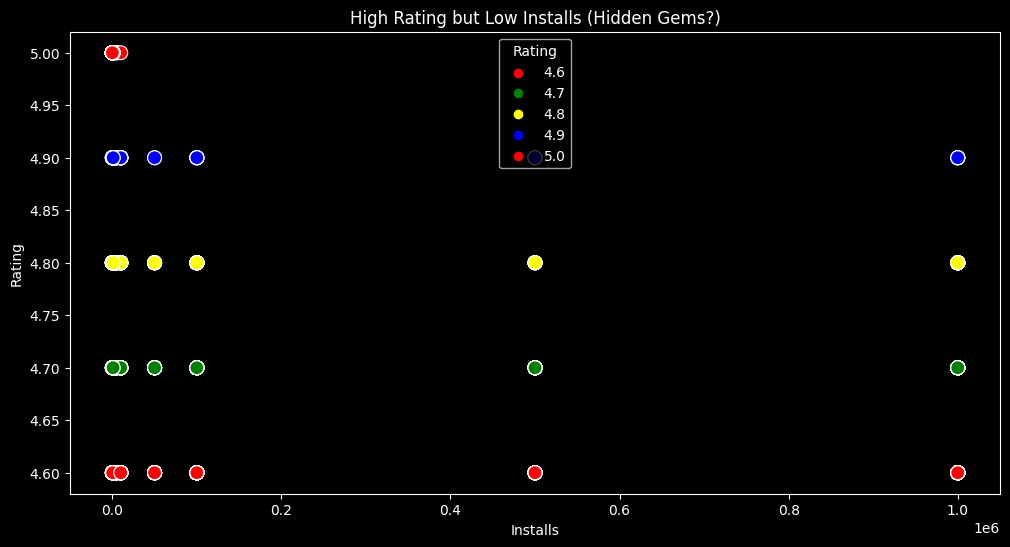

In [50]:
hidden_gems = df[(df['Rating'] > 4.5) & (df['Installs'] < 5000000)][['App', 'Rating', 'Installs']]
custom_palette = ['red', 'green', 'yellow', 'blue']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Installs', y='Rating', data=hidden_gems, hue='Rating', palette=custom_palette, s=100)
plt.title('High Rating but Low Installs (Hidden Gems?)')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.legend(title='Rating')
plt.show()

**Most Expensive Apps: Are They Worth the Price Based on Rating?**

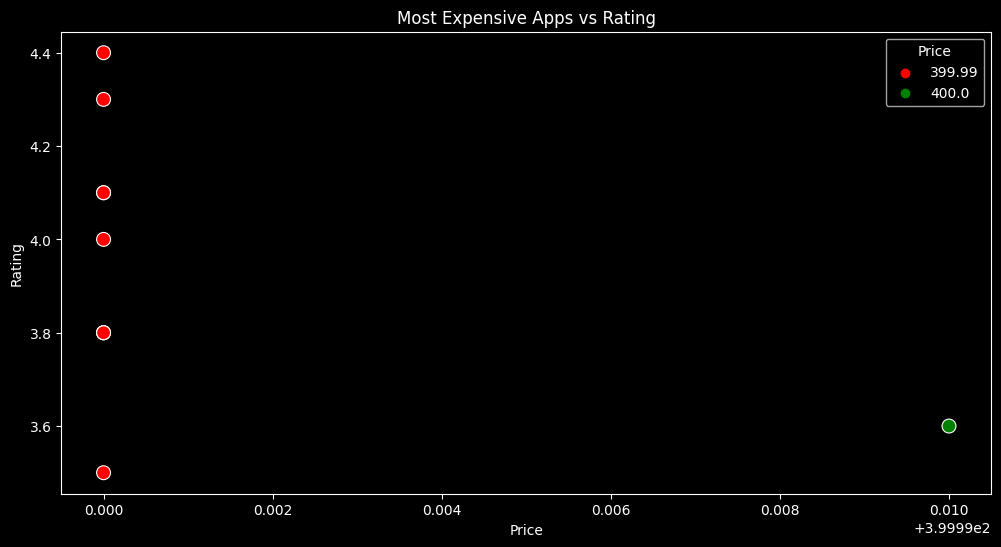

In [51]:
most_expensive_apps = df.nlargest(10, 'Price')[['App', 'Price', 'Rating']]

custom_palette = ['red', 'green', 'yellow', 'blue']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Rating', data=most_expensive_apps, hue='Price', palette=custom_palette, s=100)
plt.title('Most Expensive Apps vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Price')
plt.show()

**Outlier Detection:**

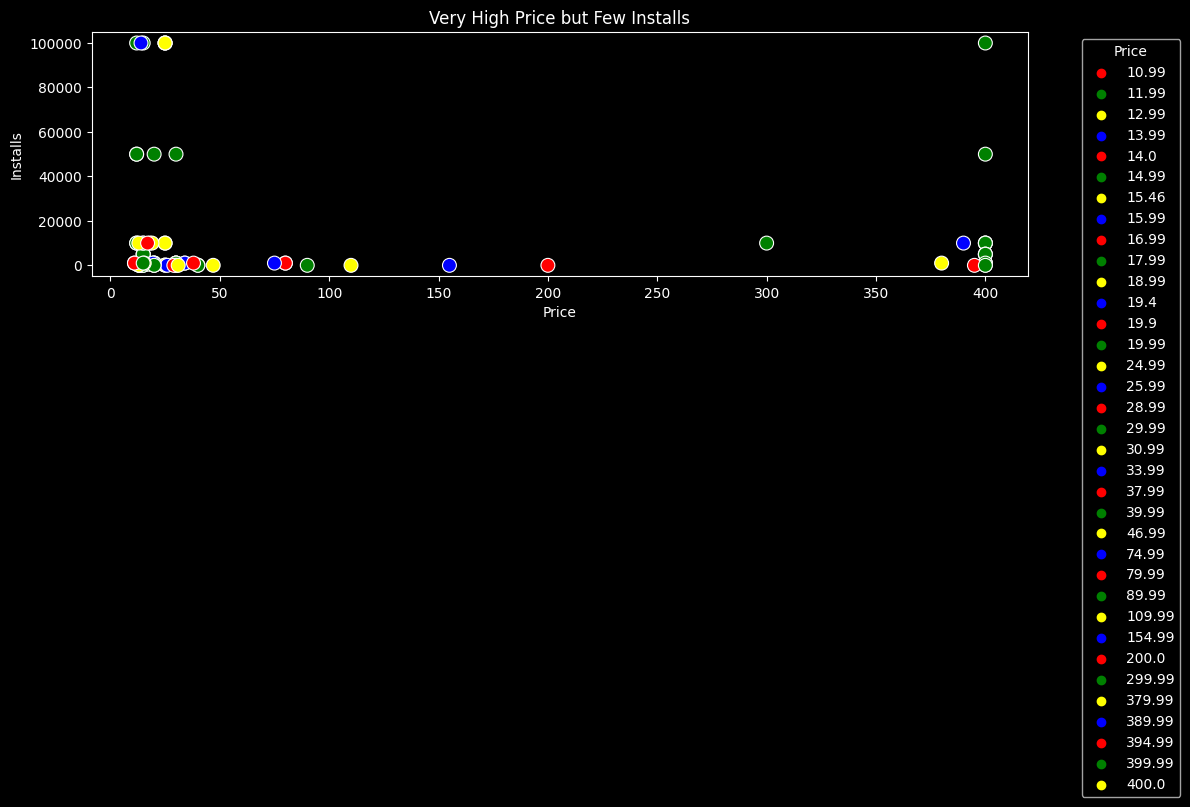

In [52]:
high_price_low_installs = df[(df['Price'] > 10) & (df['Installs'] < 1000000)][['App', 'Price', 'Installs']]

custom_palette = ['red', 'green', 'yellow', 'blue']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Installs', data=high_price_low_installs, hue='Price', palette=custom_palette, s=100)
plt.title('Very High Price but Few Installs')
plt.xlabel('Price')
plt.ylabel('Installs')

plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  
plt.show()


---

## **Thank You!**

Thank you for taking the time to go through this notebook! 💻📊  
I hope it provided valuable insights and sparked some curiosity. ✨🔍

If you found this helpful, share your thoughts, or connect for collaboration.  
Let’s keep learning and building together! 🚀🤝

Happy Coding! 👨‍💻👩‍💻
